## Can we predict short-term stock price direction (up/down) using technical indicators as input features? 

To begin this ananlysis i will:

1. Get historical price data (open, high, low, close, volume) using yfinance.


2. Create Feature Engineering and Calculate technical indicators such as:

Moving Averages (SMA, EMA)

Relative Strength Index (RSI)

MACD

Bollinger Bands

Stochastic Oscillator

Momentum, ROC (Rate of Change)


3. Create a binary target variable:
```bash
if close_price_tomorrow > close_price_today: # If tomorrows close price is more than todays label 1 else 0
    label = 1  # "up"
else:
    label = 0  # "down"
```

4. Train a model Use classifiers like:

Logistic Regression (simple benchmark)

Random Forest

XGBoost

SVM

LSTM (if using sequences/time series)

Neural Networks

5. Finally I will evaluate my model using the following metrics:
- Accuracy
- Precision/Recall
- F1-score
- Confusion Matrix
- Profit-based metrics like Sharpe ratio or cumulative return if backtesting strategies.



In [63]:
%pip install -r ../requirements.txt
%pip install ta
import time
import re
import time
import os
import yfinance as yf
from ta.momentum import RSIIndicator, StochasticOscillator
from ta.trend import MACD
from ta.volatility import BollingerBands
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use("dark_background")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


I will import the preliminary fundamental data I obtained from Tradingview.

In [64]:
import pandas as pd

# Load the uploaded CSV file
file_path = "../data/defense_2025-03-12.csv"
df = pd.read_csv(file_path)

# Show basic info and first few rows to understand structure
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Symbol                                      62 non-null     object 
 1   Description                                 62 non-null     object 
 2   Industry                                    62 non-null     object 
 3   Price                                       62 non-null     float64
 4   Price - Currency                            62 non-null     object 
 5   Price Change % 1 day                        62 non-null     float64
 6   Volume 1 day                                62 non-null     int64  
 7   Volume Change % 1 hour                      62 non-null     float64
 8   Volume Change % 1 day                       62 non-null     float64
 9   Volume Change 1 week                        62 non-null     int64  
 10  Volume Change % 

(None,
   Symbol            Description             Industry     Price  \
 0  ATROB        Astronics Corp.  Aerospace & defense   24.9000   
 1  DUAVF      DASSAULT AVIATION  Aerospace & defense  326.0100   
 2  QNTQY     Qinetiq Group Plc.  Aerospace & defense   26.7200   
 3  NSKFF  Kongsberg Gruppen ASA  Aerospace & defense  144.2886   
 4  SAABF                Saab AB  Aerospace & defense   38.7050   
 
   Price - Currency  Price Change % 1 day  Volume 1 day  \
 0              USD              3.750000           111   
 1              USD              2.518868           494   
 2              USD             -3.884892          6885   
 3              USD              2.492257           281   
 4              USD              0.138675          4861   
 
    Volume Change % 1 hour  Volume Change % 1 day  Volume Change 1 week  ...  \
 0              -66.666667             -95.262484                 18159  ...   
 1               87.719298             -71.245634                -18275  

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create binary target column: 1 if price went up, 0 otherwise
df['Target'] = (df['Price Change % 1 day'] > 0).astype(int)

# Step 2: Select relevant features (drop text descriptions, currency fields, etc.)
feature_cols = [
    'Volume 1 day', 'Volume Change % 1 hour', 'Volume Change % 1 day',
    'Volume Change 1 week', 'Volume Change % 1 month',
    'EPS diluted, Trailing 12 months', 'EPS diluted growth %, TTM YoY',
    'Relative Volume 1 day', 'Market capitalization',
    'Price to earnings ratio', 'Dividend yield %, Trailing 12 months',
    'Moving Averages Rating 1 day', 'Oscillators Rating 1 day', 'Technical Rating 1 day'
]

# Drop rows with missing values in selected columns
df_model = df[feature_cols + ['Target']].dropna()

# Encode categorical columns
for col in ['Moving Averages Rating 1 day', 'Oscillators Rating 1 day', 'Technical Rating 1 day']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])

# Step 3: Split data into training and test sets
X = df_model.drop(columns='Target')
y = df_model['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Step 5: Get metrics and feature importance
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

(report, conf_matrix, feature_importances)


({'0': {'precision': 0.6666666666666666,
   'recall': 0.5,
   'f1-score': 0.5714285714285714,
   'support': 4.0},
  '1': {'precision': 0.6666666666666666,
   'recall': 0.8,
   'f1-score': 0.7272727272727273,
   'support': 5.0},
  'accuracy': 0.6666666666666666,
  'macro avg': {'precision': 0.6666666666666666,
   'recall': 0.65,
   'f1-score': 0.6493506493506493,
   'support': 9.0},
  'weighted avg': {'precision': 0.6666666666666666,
   'recall': 0.6666666666666666,
   'f1-score': 0.658008658008658,
   'support': 9.0}},
 array([[2, 2],
        [1, 4]]),
 Price to earnings ratio                 0.168601
 Volume Change % 1 month                 0.096437
 Oscillators Rating 1 day                0.094835
 EPS diluted, Trailing 12 months         0.086461
 Relative Volume 1 day                   0.081698
 Volume Change % 1 hour                  0.073636
 Market capitalization                   0.069750
 Volume 1 day                            0.067069
 Volume Change 1 week                    

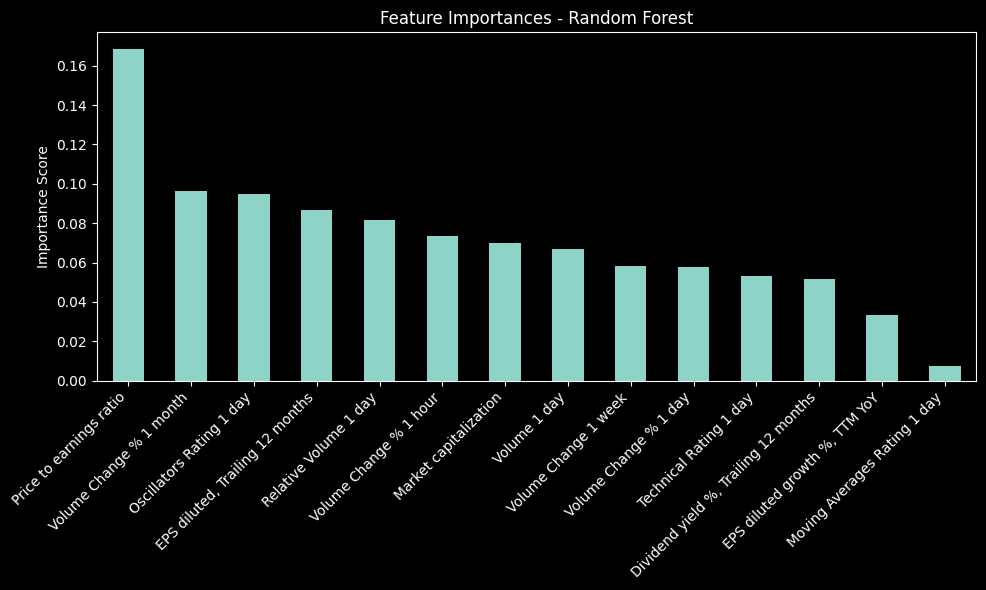

In [66]:
# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances - Random Forest")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




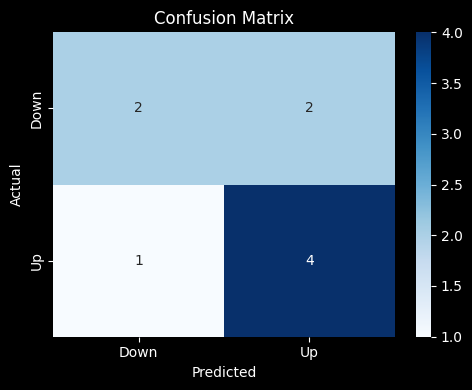

In [67]:
# Plot confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

📉 Confusion Matrix: The model predicts upward trends (1) more reliably than downward ones (0), but still handles both fairly.